<a href="https://colab.research.google.com/github/atakanerdogn/my-projects/blob/main/stroke2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4.  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
df = pd.read_csv('/content/stroke.zip')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [8]:
df.shape

(5110, 12)

In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include='object')

In [11]:
df = pd.read_csv('/content/stroke.zip')
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include='object')
num = num.drop('id', axis=1)
num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [12]:
sample = num.sample(50)
sample.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1538,54.0,0,0,77.52,35.8,0
1966,40.0,0,0,75.40,28.7,0
625,40.0,0,0,71.20,27.1,0
1264,38.0,0,0,69.34,43.7,0
744,71.0,1,0,194.62,31.6,0


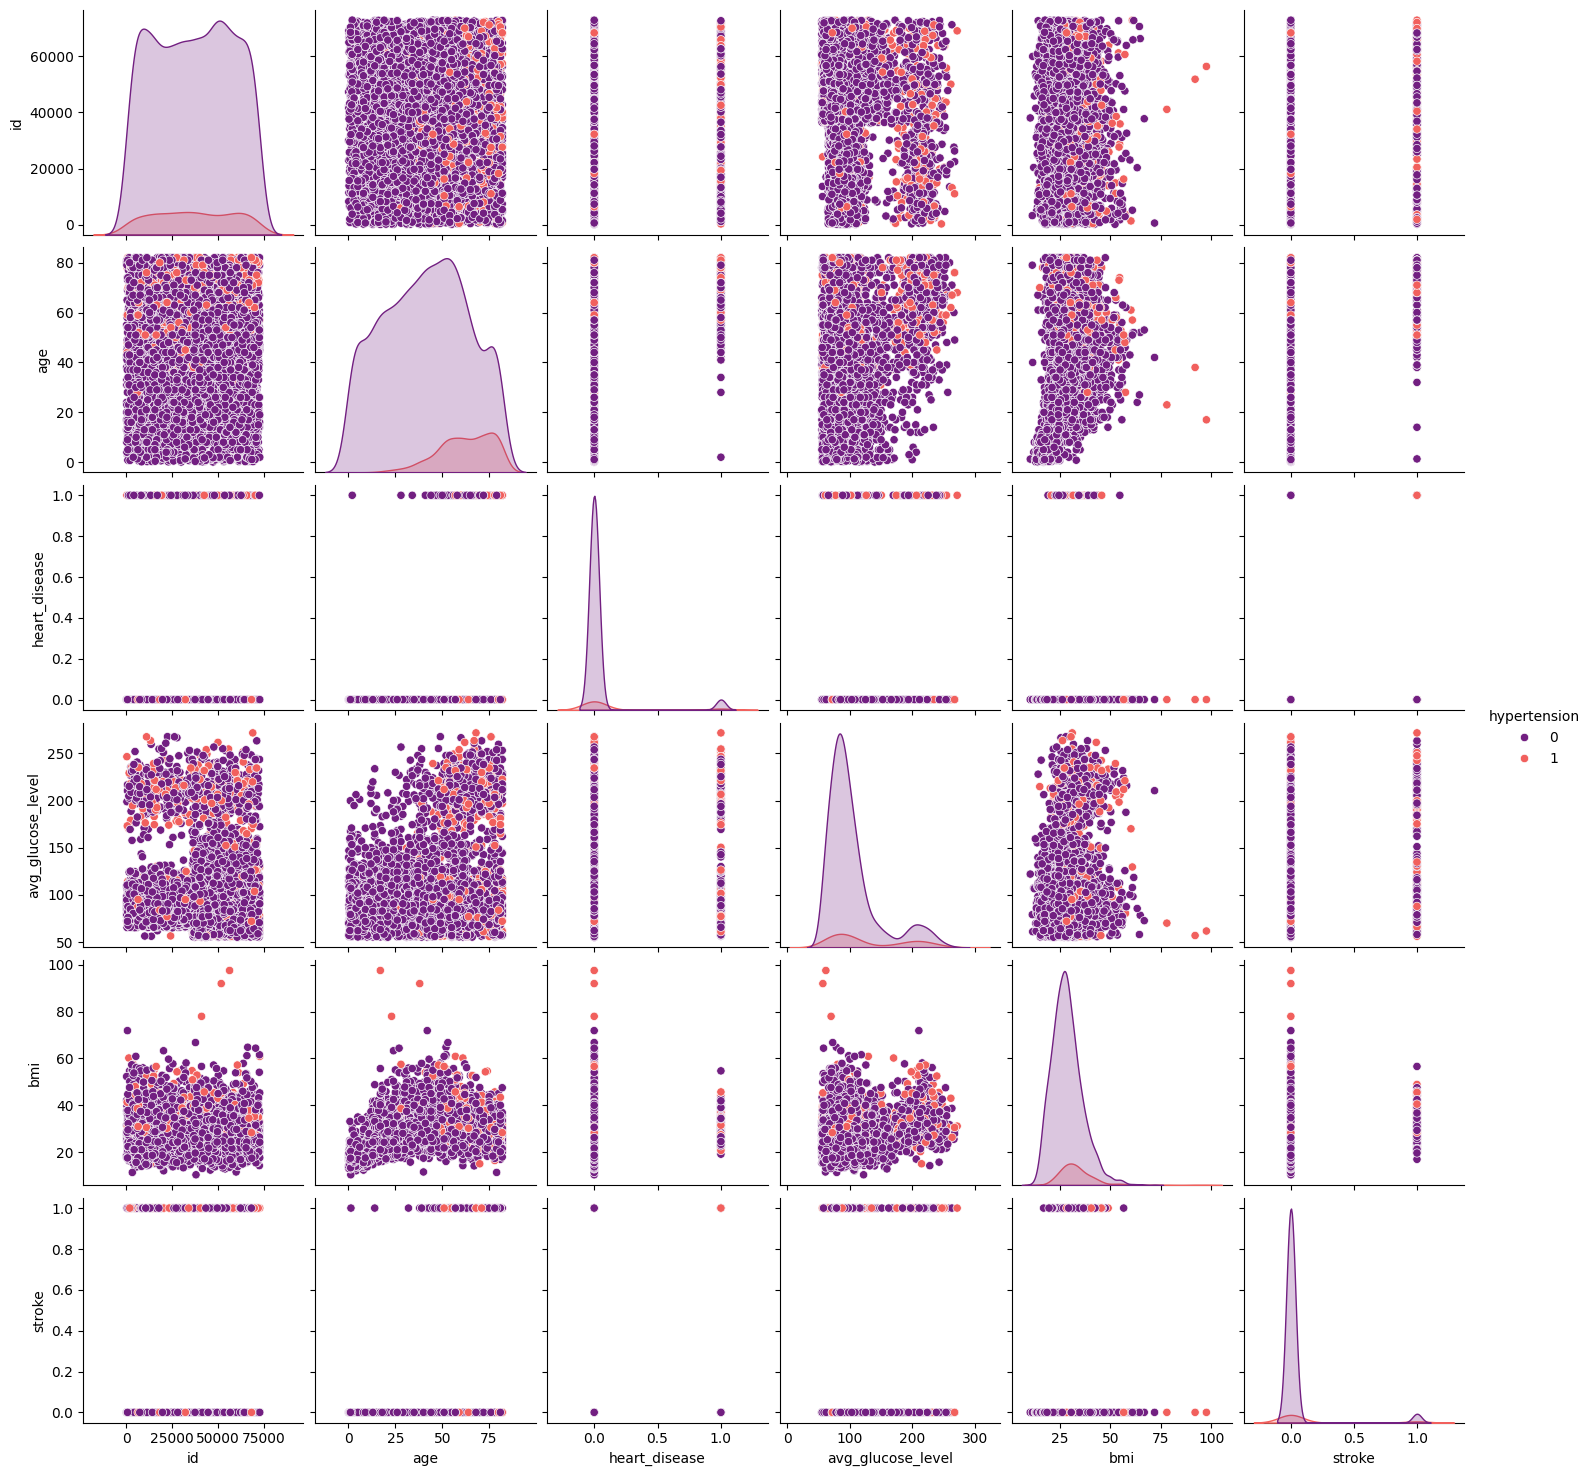

In [44]:
sns.pairplot(num, hue ='hypertension', palette = 'magma')
plt.show()

In [15]:
corr_matrix = sample.corr()
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.279455,0.382864,0.371558,0.476356,0.167808
hypertension,0.279455,1.000000,0.111111,0.406906,0.227706,-0.084215
heart_disease,0.382864,0.111111,1.000000,0.121199,-0.045941,0.196502
avg_glucose_level,0.371558,0.406906,0.121199,1.000000,0.322587,0.303941
bmi,0.476356,0.227706,-0.045941,0.322587,1.000000,0.251178
stroke,0.167808,-0.084215,0.196502,0.303941,0.251178,1.000000


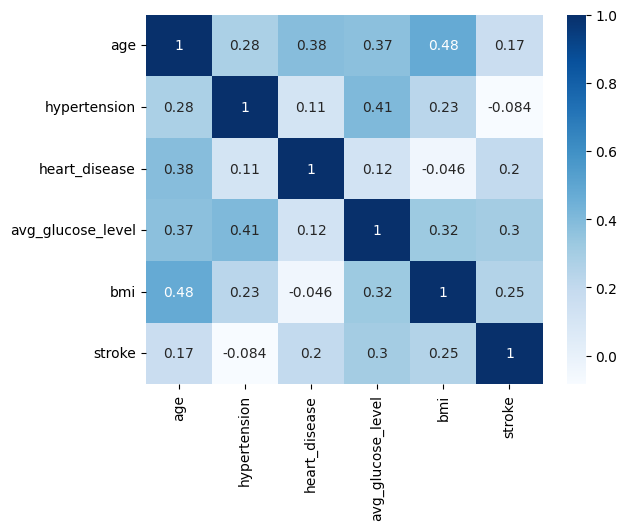

In [16]:
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show(
)

In [17]:
def select_if_bmi_greater_than_30(sample):
  return sample[sample['bmi'] > 30]

select_if_bmi_greater_than_30(sample)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1538,54.0,0,0,77.52,35.8,0
1264,38.0,0,0,69.34,43.7,0
744,71.0,1,0,194.62,31.6,0
2863,58.0,0,0,73.36,36.6,0
4643,33.0,0,0,57.10,33.1,0
113,45.0,0,0,224.10,56.6,1
3259,30.0,0,0,79.55,33.7,0
4129,78.0,0,0,208.99,31.4,0
575,45.0,0,0,99.97,35.6,0
4588,62.0,1,0,199.78,45.2,0


In [18]:
bmis = select_if_bmi_greater_than_30(num)
bmis.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
11,61.0,0,1,120.46,36.8,1
15,50.0,1,0,167.41,30.9,1


In [19]:
bmis.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,49.691918,0.143687,0.062335,114.254152,36.550555,0.050713
std,17.196861,0.350865,0.241827,51.892290,6.255820,0.219469
min,0.800000,0.000000,0.000000,55.260000,30.100000,0.000000
25%,37.000000,0.000000,0.000000,78.740000,32.100000,0.000000
50%,51.000000,0.000000,0.000000,93.960000,34.700000,0.000000
75%,62.000000,0.000000,0.000000,127.400000,39.200000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
bmis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 0 to 5107
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1893 non-null   float64
 1   hypertension       1893 non-null   int64  
 2   heart_disease      1893 non-null   int64  
 3   avg_glucose_level  1893 non-null   float64
 4   bmi                1893 non-null   float64
 5   stroke             1893 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 103.5 KB


In [21]:
#bmi vs stroke

bmi_vs_stroke = bmis['stroke'].value_counts()
bmi_vs_stroke

,count
stroke,
0,1797
1,96


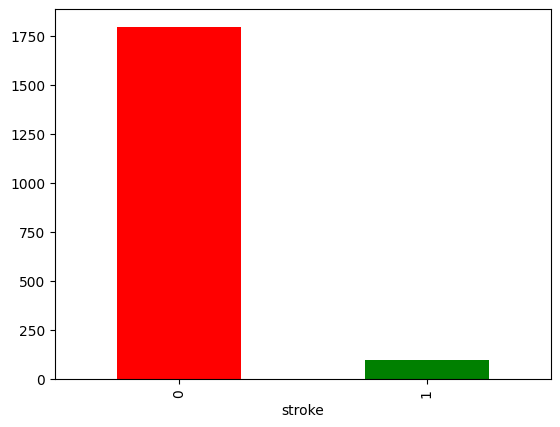

In [22]:
#bmi cs stroke

bmi_vs_stroke.plot(kind='bar', color=['red', 'green'])
plt.show()

In [23]:
bmi_vs_stroke = sample.groupby('bmi')['stroke'].value_counts().sum()
bmi_vs_stroke


np.int64(48)

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
num.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [27]:
cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [28]:
df = pd.read_csv('/content/stroke.zip')
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include='object')
num = num.drop('id', axis=1)
num.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [29]:
gender = df['gender'].value_counts()
gender

,count
gender,
Female,2994
Male,2115
Other,1


In [30]:
gender.drop('Other', axis=0,inplace = True)
gender.value_counts()
gender

,count
gender,
Female,2994
Male,2115


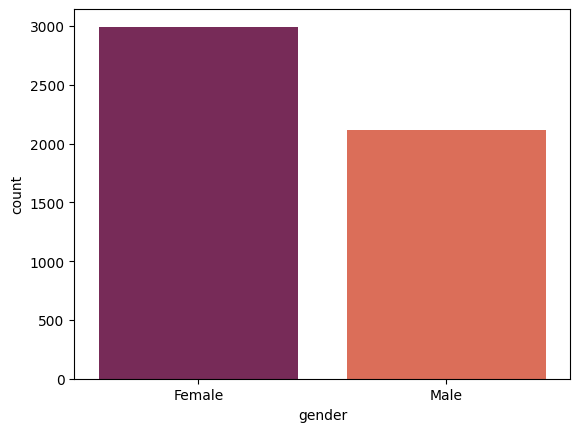

In [31]:
sns.barplot(gender, palette='rocket')
plt.show()

In [32]:
cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

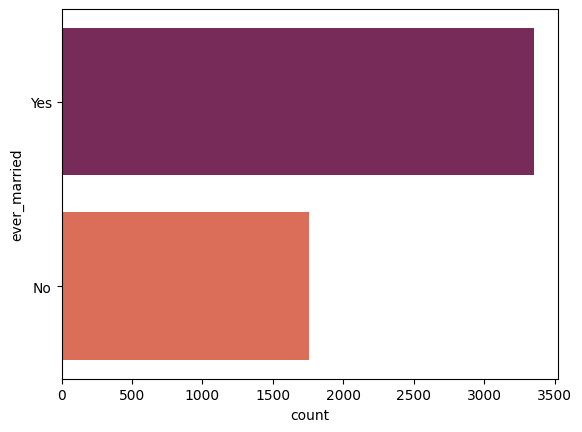

In [33]:
sns.countplot(df['ever_married'], palette='rocket')
plt.show()

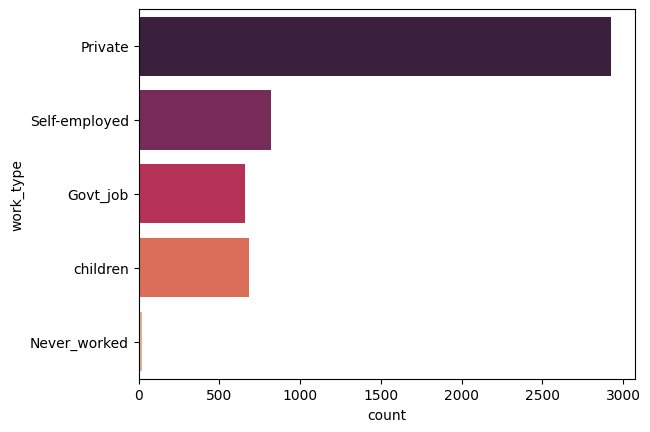

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [34]:
sns.countplot(df['work_type'], palette='rocket')
plt.show()

df['work_type'].value_counts()

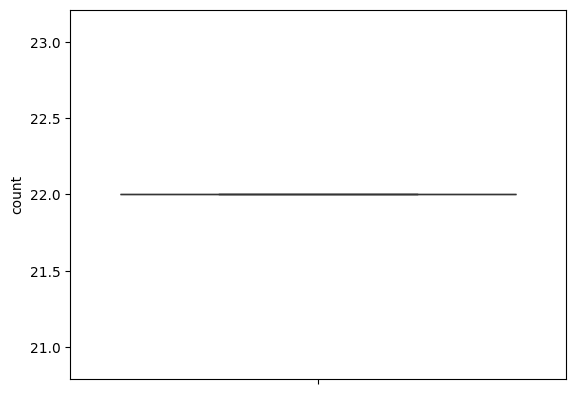

In [35]:
never_worked = df[df['work_type'] == 'Never_worked']['work_type'].value_counts()
sns.boxplot(never_worked, palette='viridis')
plt.show()

In [36]:
# bivariate analysis
num.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [37]:
# heart disease vs bmi

h_vs_bmi = df.groupby('heart_disease')['bmi'].value_counts()
h_vs_bmi

heart_disease  bmi 
0              28.7    39
               28.4    36
               23.4    35
               26.1    35
               27.6    35
                       ..
1              42.7     1
               43.9     1
               44.5     1
               45.7     1
               54.7     1
Name: count, Length: 561, dtype: int64

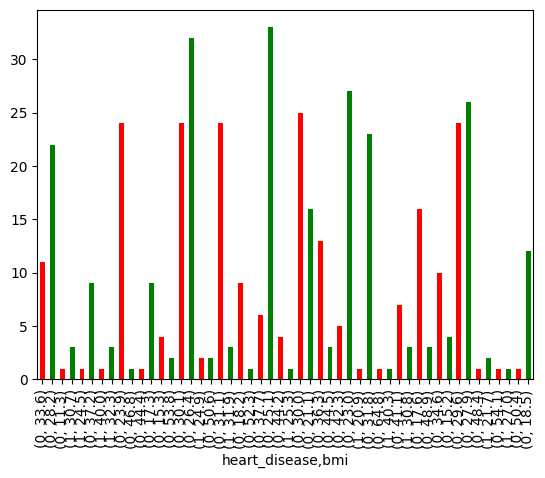

In [38]:
h_vs_bmi = h_vs_bmi.sample(50)
h_vs_bmi.plot(kind='bar', color=['red', 'green'])
plt.show()


In [39]:
# bmi vs hypertension

b_vs_hy = df.groupby('bmi')['hypertension'].value_counts()
b_vs_hy


,,count
bmi,hypertension,
10.3,0,1
11.3,0,1
11.5,0,1
12.0,0,1
12.3,0,1
...,...,...
66.8,0,1
71.9,0,1
78.0,1,1


In [40]:
df['bmi'].isnull()
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [72]:
df = pd.read_csv('/content/stroke.zip')
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include='object')
cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [56]:
num.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [57]:
cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [73]:
i = num.dropna(axis=0,inplace=True)


In [91]:
sample1 = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred}).sample(50)
sample1

,Actual,Predicted
540,0,0.014438
3598,0,0.049388
1938,0,0.090195
1395,0,0.041580
3257,0,0.073977
1436,0,0.121821
802,0,0.092507
4711,0,0.144305
927,0,0.067520
4416,0,0.012822


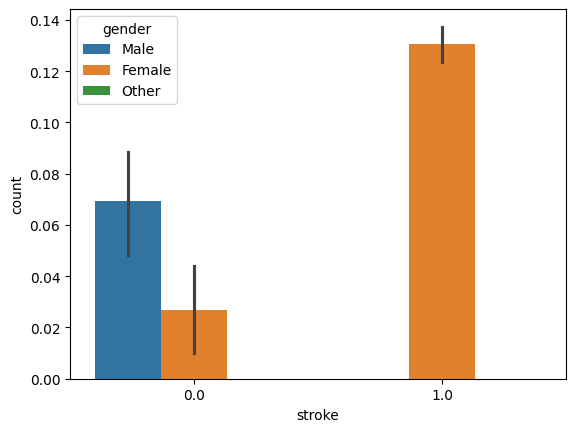

In [97]:
sns.barplot(x=sample1['Actual'], y=sample1['Predicted'], hue=df['gender'], )
plt.xlabel('stroke')
plt.ylabel('count')
plt.show()

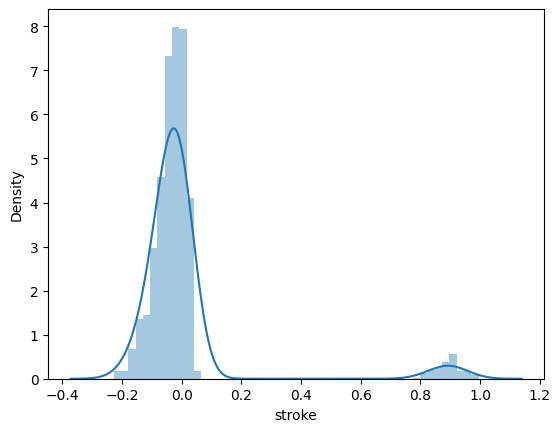

In [106]:
from sklearn.linear_model import LinearRegression
x = num.drop('stroke', axis=1)
y = num['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

sns.distplot(y_test - y_pred)
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473

[[1400    1]
 [  72    0]]


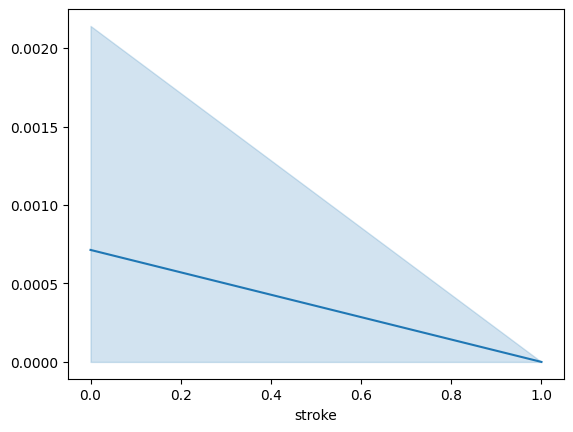

In [111]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

sns.lineplot(x=y_test, y=y_pred)
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473

[[1401    0]
 [  72    0]]


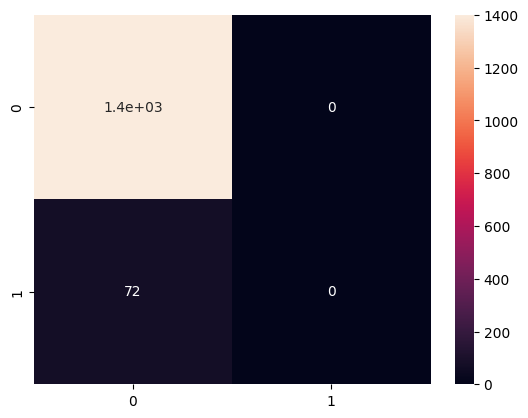

In [115]:
from sklearn.svm import SVC as SupportVectorClassifier
model = SupportVectorClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1401
           1       0.11      0.10      0.10        72

    accuracy                           0.92      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.91      0.92      0.91      1473

[[1343   58]
 [  65    7]]


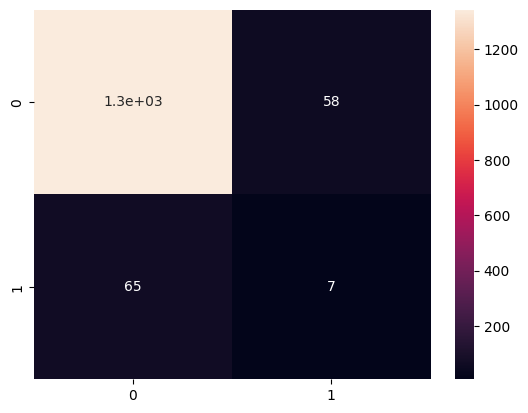

In [116]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
